In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score

In [228]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

In [229]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [230]:
df["Class"].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [231]:
df["Category"] = df["Class"].map({"Çerçevelik" : 0, "Ürgüp Sivrisi" : 1})

In [232]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,Category
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


In [233]:
df["Category"].value_counts(normalize=True)

Category
0    0.52
1    0.48
Name: proportion, dtype: float64

In [234]:
df.duplicated().sum()

0

In [235]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
Category             0
dtype: int64

In [236]:
df.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
Category               int64
dtype: object

In [237]:
df_new = df.drop(columns=["Class"])

In [238]:
df_new.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Category
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [239]:
df.shape

(2500, 14)

# EDA

In [240]:
cols = list(df_new.columns)
cols.remove("Category")

In [241]:
for column in cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    med = df[column].median()
    low = med - (1.5*iqr)
    high = med + (1.5*iqr)
    df_new = df_new[df_new[column]<high]

<Axes: xlabel='Compactness'>

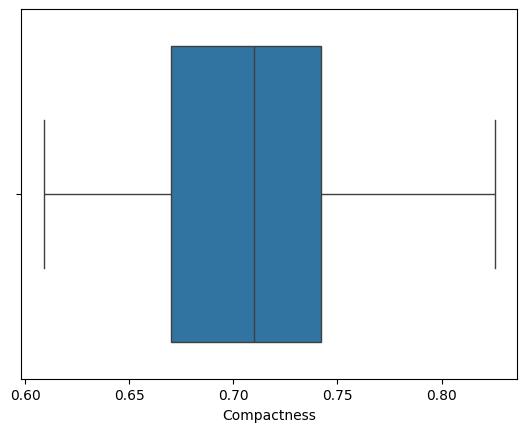

In [242]:
sns.boxplot(x = "Compactness", data=df_new)

In [243]:
y = df_new["Category"]
X = df_new.copy()
X = X.drop(columns=["Category"])

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [245]:
clf = LogisticRegression(max_iter=1000, random_state=0).fit(X_train, y_train)

In [246]:
clf.coef_

array([[ 0.00369105,  0.00833472,  0.37166054,  0.60132513, -0.00355791,
        -1.02717673,  0.59548018,  0.64149316,  0.50790086,  0.47633438,
         1.58969924,  0.41391775]])

In [247]:
y_pred = clf.predict(X_test)

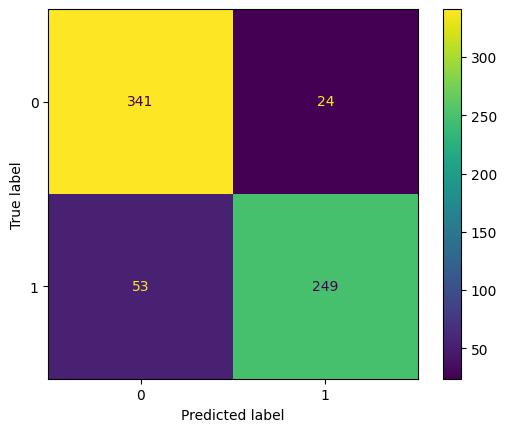

In [248]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

In [249]:
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("F1: " + str(f1_score(y_test, y_pred)))

Precision: 0.9120879120879121
Recall: 0.8245033112582781
Accuracy: 0.8845577211394303
F1: 0.8660869565217392


In [250]:
clf.coef_

array([[ 0.00369105,  0.00833472,  0.37166054,  0.60132513, -0.00355791,
        -1.02717673,  0.59548018,  0.64149316,  0.50790086,  0.47633438,
         1.58969924,  0.41391775]])